# Sleep Disorder Prediction

## ML-Project WorkFlow 
1) Loading the data
2) Data Cleaning
3) EDA 
4) Train Test Split
5) Data Preprocessing 
6) Build the ML-model
7) Hyperparameter Tuning
8) Dump the final-model into Pickle file

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("Sleep_health_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
df.shape

(374, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [9]:
## creating "None" category assuming the person with No sleep disorder. 
df["Sleep Disorder"].fillna("None", inplace=True)

In [10]:
df["Sleep Disorder"].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [11]:
### Now the Target column contains 3-categories so, It is a Multi-class Classification problem

In [12]:
## storing Person_IDs and dropping that column as it doesn't contribute to target-column.
unq_id = df["Person ID"]
df.drop("Person ID", axis=1, inplace=True)
df.shape

(374, 12)

In [13]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Exploratory Data Analysis (EDA)

In [15]:
df["Sleep Disorder"].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

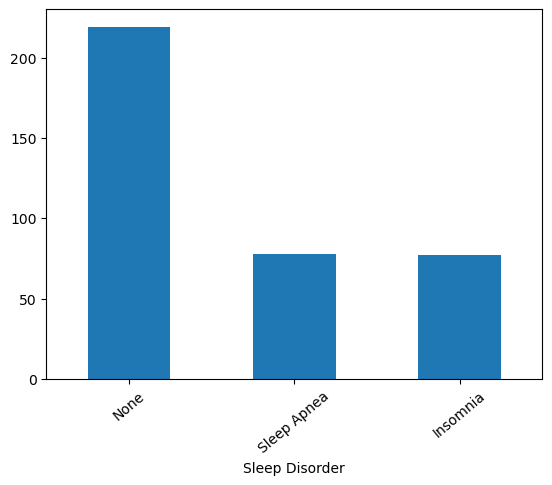

In [16]:
# Distributions of Sleep-Disorders over the dataset
df["Sleep Disorder"].value_counts().plot(kind="bar")
plt.xticks(rotation=40)
plt.show()

In [17]:
num_df = df.select_dtypes(exclude="object")
num_df.corr()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


In [18]:
## from above correlation matrix
## observed that "Sleep Duration" is mostly correlated to "Quality of Sleep" i.e, = 0.88 
# so we consider only "Sleep Duration" for further process and droping the "Quality of Sleep" feature
df.drop("Quality of Sleep", axis=1, inplace=True)

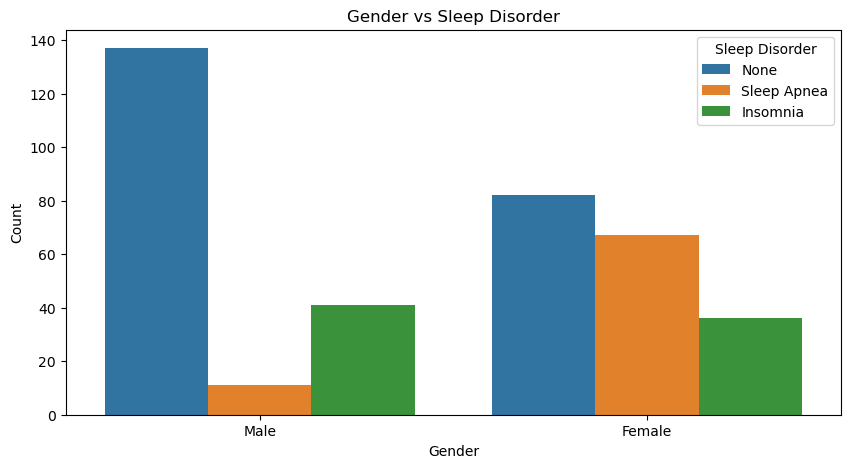

In [19]:
# Gender vs Sleep Disorder
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Gender", hue="Sleep Disorder")
plt.title("Gender vs Sleep Disorder")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

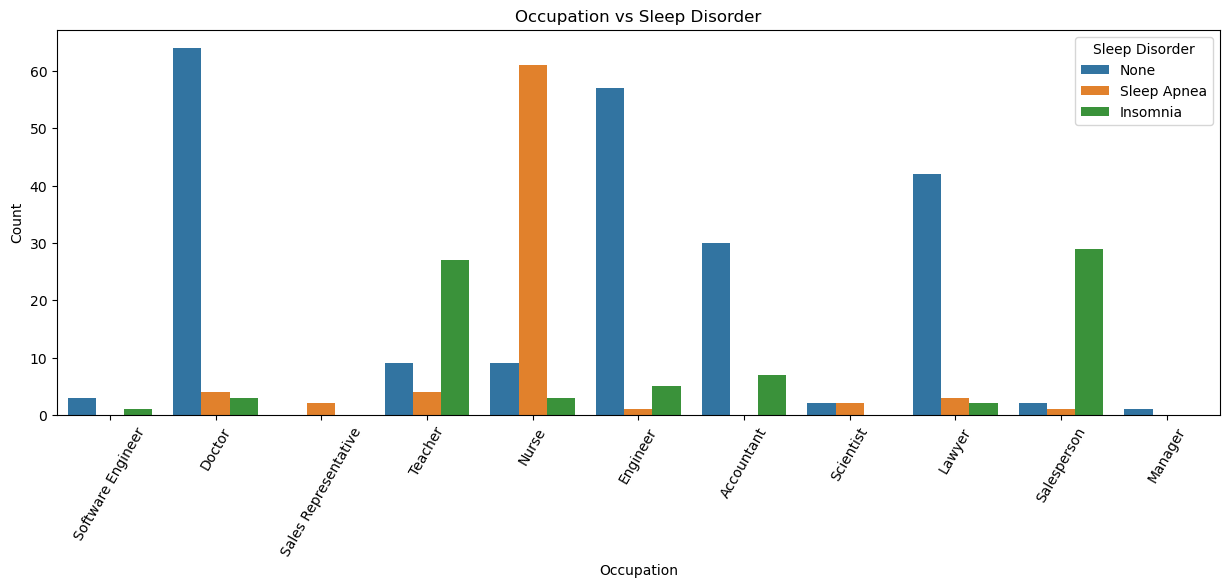

In [20]:
# Occupation vs Sleep Disorder
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="Occupation", hue="Sleep Disorder")
plt.title("Occupation vs Sleep Disorder")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.show()

In [21]:
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [22]:
## Normal & Normal Weights both means same. so Converting them into 1-category
df["BMI Category"].replace("Normal Weight", "Normal", inplace=True)
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

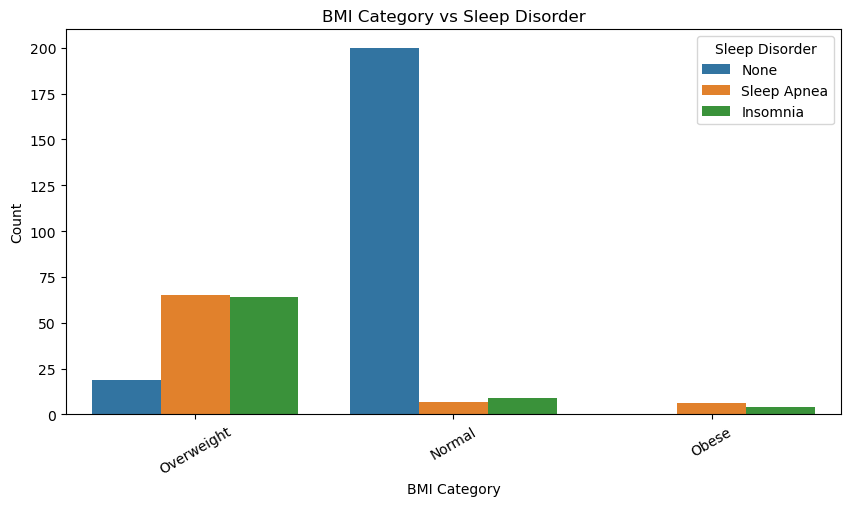

In [23]:
# BMI Category vs Sleep Disorder
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="BMI Category", hue="Sleep Disorder")
plt.title("BMI Category vs Sleep Disorder")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

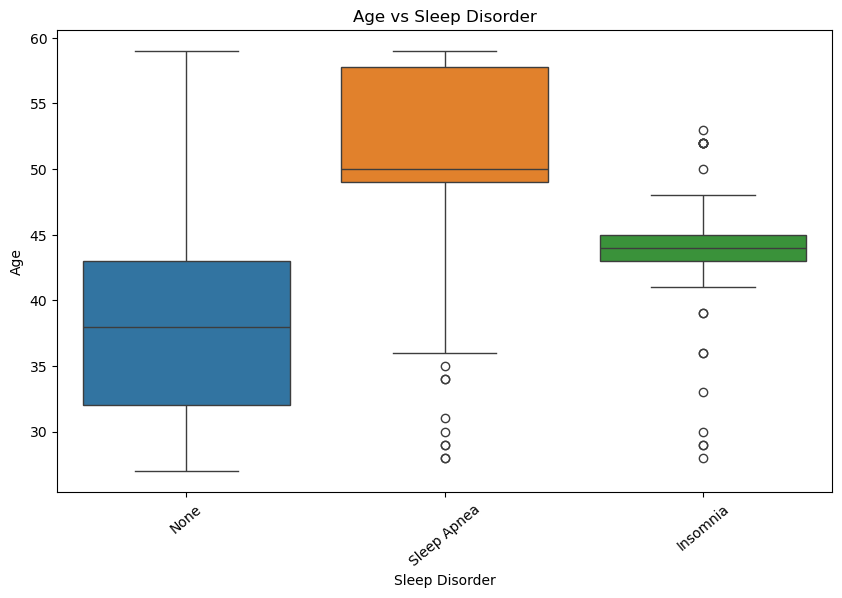

In [24]:
# Age vs Sleep Disorder
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Sleep Disorder", y="Age", hue="Sleep Disorder")
plt.title("Age vs Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Age")
plt.xticks(rotation=40)
plt.show()

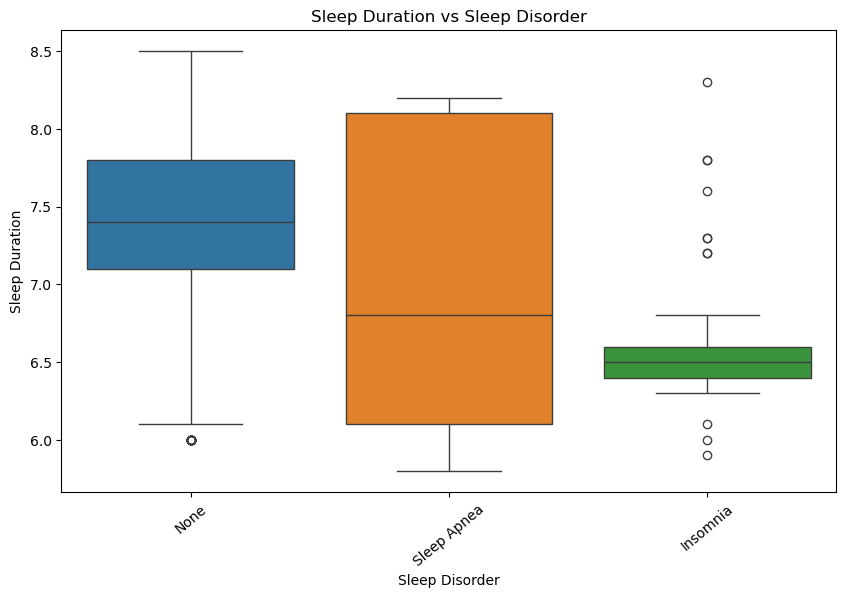

In [25]:
# Age vs Sleep Disorder
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Sleep Disorder", y="Sleep Duration", hue="Sleep Disorder")
plt.title("Sleep Duration vs Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Sleep Duration")
plt.xticks(rotation=40)
plt.show()

<Axes: xlabel='Physical Activity Level', ylabel='Stress Level'>

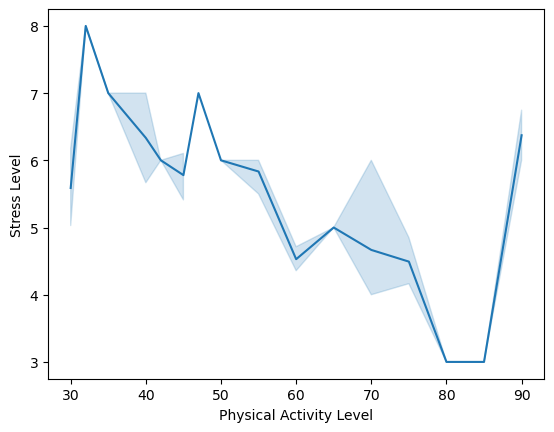

In [26]:
## Physical Activity Level vs Stress Level
sns.lineplot(data=df, x="Physical Activity Level", y="Stress Level")

## Train Test Split

In [28]:
## Independent features
X = df.drop("Sleep Disorder", axis=1)
## Target feature
y = df["Sleep Disorder"]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# resetting index for avoiding complications in preprocessing 
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [30]:
X_train.shape, X_test.shape

((336, 10), (38, 10))

In [31]:
y_train.shape, y_test.shape 

((336,), (38,))

## Data Preprocessing
(Encoding, Scaling)

In [33]:
X_train.head()

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,Male,39,Lawyer,7.2,60,5,Normal,130/85,68,8000
1,Male,41,Lawyer,7.6,90,5,Normal,130/85,70,8000
2,Male,44,Salesperson,6.5,45,7,Overweight,130/85,72,6000
3,Female,50,Nurse,6.1,90,8,Overweight,140/95,75,10000
4,Female,30,Nurse,6.4,35,7,Normal,130/86,78,4100


In [34]:
np.dtype(X_train["Blood Pressure"])

dtype('O')

In [35]:
# Blood Pressure is in "object" type. So, BP-feature should be converted to int64.
# so, it is splitted into 2-new features BP_up, BP_down
BP_up_values = []
BP_down_values = []
for i in X_train["Blood Pressure"].values:
    up = int(i.split('/')[0])
    down = int(i.split('/')[1])
    BP_up_values.append(up)
    BP_down_values.append(down)
    
X_train["BP_up"] = pd.DataFrame(BP_up_values)
X_train["BP_down"] = pd.DataFrame(BP_down_values)
X_train.drop("Blood Pressure", axis=1, inplace=True)
# arranging training df
X_train = pd.concat([X_train.iloc[:,:7], X_train[["BP_up","BP_down"]], X_train.iloc[:,7:9]], axis=1)
X_train.head()

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,BP_up,BP_down,Heart Rate,Daily Steps
0,Male,39,Lawyer,7.2,60,5,Normal,130,85,68,8000
1,Male,41,Lawyer,7.6,90,5,Normal,130,85,70,8000
2,Male,44,Salesperson,6.5,45,7,Overweight,130,85,72,6000
3,Female,50,Nurse,6.1,90,8,Overweight,140,95,75,10000
4,Female,30,Nurse,6.4,35,7,Normal,130,86,78,4100


In [36]:
# same applying on the Test data 
BP_up_values = []
BP_down_values = []
for i in X_test["Blood Pressure"].values:
    up = int(i.split('/')[0])
    down = int(i.split('/')[1])
    BP_up_values.append(up)
    BP_down_values.append(down)
    
X_test["BP_up"] = pd.DataFrame(BP_up_values)
X_test["BP_down"] = pd.DataFrame(BP_down_values)
X_test.drop("Blood Pressure", axis=1, inplace=True)
# arranging test df
X_test = pd.concat([X_test.iloc[:,:7], X_test[["BP_up","BP_down"]], X_test.iloc[:,7:9]], axis=1)
X_test.head()

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,BP_up,BP_down,Heart Rate,Daily Steps
0,Female,53,Engineer,8.5,30,3,Normal,125,80,65,5000
1,Male,31,Doctor,6.1,30,8,Normal,125,80,72,5000
2,Male,29,Doctor,6.0,30,8,Normal,120,80,70,8000
3,Female,53,Engineer,8.5,30,3,Normal,125,80,65,5000
4,Male,32,Doctor,6.0,30,8,Normal,125,80,72,5000


In [75]:
X_train.to_csv("X_train_to_preprocess.csv", index=False)

In [37]:
# Numerical features
num_cols = X_train.select_dtypes(exclude="object").columns.tolist()
num_cols

['Age',
 'Sleep Duration',
 'Physical Activity Level',
 'Stress Level',
 'BP_up',
 'BP_down',
 'Heart Rate',
 'Daily Steps']

In [38]:
## feature Scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [39]:
X_train.head()

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,BP_up,BP_down,Heart Rate,Daily Steps
0,Male,-0.285714,Lawyer,0.000000,0.000000,0.000000,Normal,0.0,0.0,-0.50,0.476190
1,Male,-0.142857,Lawyer,0.307692,1.000000,0.000000,Normal,0.0,0.0,0.00,0.476190
2,Male,0.071429,Salesperson,-0.538462,-0.500000,0.666667,Overweight,0.0,0.0,0.50,-0.476190
3,Female,0.500000,Nurse,-0.846154,1.000000,1.000000,Overweight,1.0,1.0,1.25,1.428571
4,Female,-0.928571,Nurse,-0.615385,-0.833333,0.666667,Normal,0.0,0.1,2.00,-1.380952


In [40]:
# Categorical features
cat_cols = X_train.select_dtypes(include="object").columns.tolist()
cat_cols

['Gender', 'Occupation', 'BMI Category']

In [41]:
## feature Encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop="first", handle_unknown='ignore')

def encode_data(cols: list) -> (pd.DataFrame,pd.DataFrame):
    # encoding for training data
    train_encoded = ohe.fit_transform(X_train[cols])
    train_encoded = pd.DataFrame(train_encoded, columns=ohe.get_feature_names_out(cols)).astype("int64")
    # encoding for test data
    test_encoded = ohe.transform(X_test[cols])
    test_encoded = pd.DataFrame(test_encoded, columns=ohe.get_feature_names_out(cols)).astype("int64")
    return train_encoded, test_encoded

In [42]:
# assigning the encoded-dfs into some other variables  
encoded_X_train_df, encoded_X_test_df = encode_data(cat_cols)

In [43]:
encoded_X_train_df.head()

,Gender_Male,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Obese,BMI Category_Overweight
0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0


In [44]:
encoded_X_test_df.head()

,Gender_Male,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Obese,BMI Category_Overweight
0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0


In [45]:
# dropping old categorical-features
X_train.drop(cat_cols, axis=1, inplace=True)

In [46]:
X_train.head()

,Age,Sleep Duration,Physical Activity Level,Stress Level,BP_up,BP_down,Heart Rate,Daily Steps
0,-0.285714,0.000000,0.000000,0.000000,0.0,0.0,-0.50,0.476190
1,-0.142857,0.307692,1.000000,0.000000,0.0,0.0,0.00,0.476190
2,0.071429,-0.538462,-0.500000,0.666667,0.0,0.0,0.50,-0.476190
3,0.500000,-0.846154,1.000000,1.000000,1.0,1.0,1.25,1.428571
4,-0.928571,-0.615385,-0.833333,0.666667,0.0,0.1,2.00,-1.380952


In [47]:
X_train = pd.concat([encoded_X_train_df, X_train], axis=1)
X_train.head(2)

,Gender_Male,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,...,BMI Category_Obese,BMI Category_Overweight,Age,Sleep Duration,Physical Activity Level,Stress Level,BP_up,BP_down,Heart Rate,Daily Steps
0,1,0,0,1,0,0,0,0,0,0,...,0,0,-0.285714,0.000000,0.0,0.0,0.0,0.0,-0.5,0.47619
1,1,0,0,1,0,0,0,0,0,0,...,0,0,-0.142857,0.307692,1.0,0.0,0.0,0.0,0.0,0.47619


In [48]:
# dropping old categorical-features
X_test.drop(cat_cols, axis=1, inplace=True)

In [49]:
X_test.head()

,Age,Sleep Duration,Physical Activity Level,Stress Level,BP_up,BP_down,Heart Rate,Daily Steps
0,0.714286,1.000000,-1.0,-0.666667,-0.5,-0.5,-1.25,-0.952381
1,-0.857143,-0.846154,-1.0,1.000000,-0.5,-0.5,0.50,-0.952381
2,-1.000000,-0.923077,-1.0,1.000000,-1.0,-0.5,0.00,0.476190
3,0.714286,1.000000,-1.0,-0.666667,-0.5,-0.5,-1.25,-0.952381
4,-0.785714,-0.923077,-1.0,1.000000,-0.5,-0.5,0.50,-0.952381


In [50]:
X_test = pd.concat([encoded_X_test_df, X_test], axis=1)
X_test.head(2)

,Gender_Male,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,...,BMI Category_Obese,BMI Category_Overweight,Age,Sleep Duration,Physical Activity Level,Stress Level,BP_up,BP_down,Heart Rate,Daily Steps
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0.714286,1.000000,-1.0,-0.666667,-0.5,-0.5,-1.25,-0.952381
1,1,1,0,0,0,0,0,0,0,0,...,0,0,-0.857143,-0.846154,-1.0,1.000000,-0.5,-0.5,0.50,-0.952381


In [77]:
y_train.to_csv("y_train_to_preprocess.csv", index=False)

In [51]:
## Labelling Target-feature
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [52]:
y_train[:5]

array([1, 1, 1, 2, 2])

## Model Building 

In [54]:
# Importing some Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [55]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    SVC(kernel='linear'),
    KNeighborsClassifier(),
    GaussianNB()
]

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [57]:
# training phase
for model in models:
    # fitting the model on training data
    model.fit(X_train, y_train)
    # making predictions on test data
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(model.__class__.__name__)
    print("Accuracy Score =",acc)
    print(confusion_matrix(y_test, y_pred))
    print("-"*40)

LogisticRegression
Accuracy Score = 0.9736842105263158
[[ 8  0  1]
 [ 0 26  0]
 [ 0  0  3]]
----------------------------------------
DecisionTreeClassifier
Accuracy Score = 0.9736842105263158
[[ 8  0  1]
 [ 0 26  0]
 [ 0  0  3]]
----------------------------------------
RandomForestClassifier
Accuracy Score = 0.9736842105263158
[[ 8  0  1]
 [ 0 26  0]
 [ 0  0  3]]
----------------------------------------
AdaBoostClassifier
Accuracy Score = 0.8947368421052632
[[ 8  1  0]
 [ 0 26  0]
 [ 0  3  0]]
----------------------------------------
GradientBoostingClassifier
Accuracy Score = 0.9736842105263158
[[ 8  0  1]
 [ 0 26  0]
 [ 0  0  3]]
----------------------------------------
XGBClassifier
Accuracy Score = 0.9736842105263158
[[ 8  0  1]
 [ 0 26  0]
 [ 0  0  3]]
----------------------------------------
SVC
Accuracy Score = 0.9473684210526315
[[ 8  0  1]
 [ 1 25  0]
 [ 0  0  3]]
----------------------------------------
KNeighborsClassifier
Accuracy Score = 0.9736842105263158
[[ 8  0  1]
 [ 0

In [58]:
# Majority of the models performance is same 
## Choosing a boosting algorithm as right estimator --> "GradientBoostingClassifier()"
## since GB-Classifier deals/handles Outliers-data in much better way than remaining algorithms.

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

In [120]:
# set parameters for getting more generalized model
param_grid = {
    "n_estimators" : [100, 200, 300],
    "learning_rate" : [0.01, 0.1],
    "min_samples_split" : [2,3,5],
    "min_samples_leaf" : [1,5],
    "max_depth" : [1,3,5]
}

In [122]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [1, 3, 5],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 200, 300]})

In [126]:
cv.best_score_

0.9078138718173836

In [128]:
cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 300}

In [130]:
cv.best_estimator_

GradientBoostingClassifier(min_samples_leaf=5, n_estimators=300)

In [134]:
# for dumping the model 
import pickle as pk

In [136]:
# finalizing the best estimator got from Hyperparameter tuning.
final_gb_model = cv.best_estimator_

model_file_path = open("GB_model.pkl", 'wb')
pk.dump(final_gb_model, model_file_path)
model_file_path.close()

In [ ]:
# load the dumped gb-model
import pickle as pk

model_path = open("GB_model.pkl",'rb')
model = pk.load(model_path)
model